## **Import the Modules and read the real and fake images using openCV or cv2**

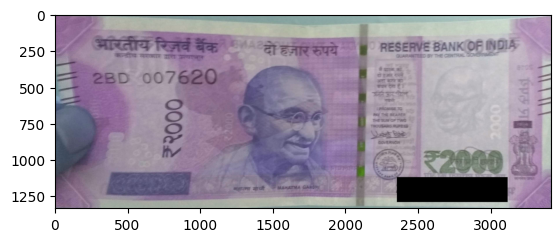

In [ ]:
import cv2                              #OpenCV or cv2 is a Python library that allows you to perform image processing and computer
                                        # vision tasks. It provides a wide range of features, including object detection,
                                        #face recognition, and tracking.
import matplotlib.pyplot as plt         #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

                                        # 1. Create publication quality plots.
                                        # 2. Make interactive figures that can zoom, pan, update.
                                        # 3. Customize visual style and layout.
import numpy as np                      #NumPy is a Python library used for working with arrays.
                                        #NumPy can be used to perform a wide variety of mathematical operations on arrays.
A = cv2.imread('/content/Real.jpg')      #cv2.imread()- Loading the image or read a image
P = cv2.imread('/content/fake.jpg')
plt.imshow(A)

# **Here, we are converting the colored image into Black and White. Because it is easier to find important features of image when it is in black and white.**

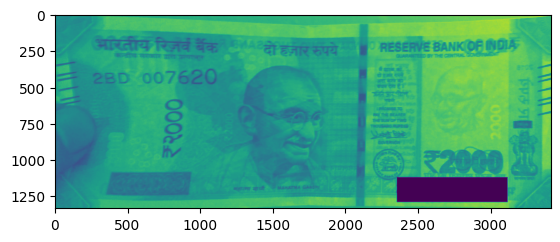

In [ ]:
a = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)      #cv2.cvtColor() method is used to convert an image from one color space to another.
p = cv2.cvtColor(P, cv2.COLOR_BGR2GRAY)      #cv2.COLOR_BGR2GRAY returns image in Grayscale format, which was initially in BGR format as read by cv2.imread().
plt.imshow(a)

# **Here, we are extracting the image of Gandhi Ji from the real note.**
NOTE: every time you are extracting the image of Gandhi Ji, you need to adjust the coordinates.

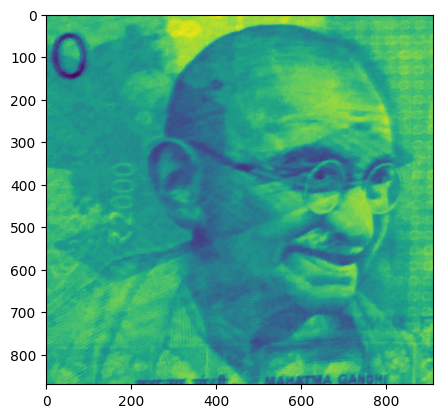

In [ ]:
a2tr = a[330:1200, 1016:1927]
plt.imshow(a2tr)                #The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.

# **Here we are doing the same thing for fake note.**

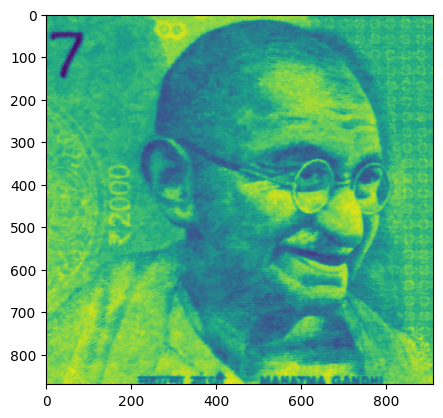

In [ ]:
b2tr = p[170:1040, 716:1627]
plt.imshow(b2tr)

# **Here we are extracting the thin strip from real note.**

(1332, 3416)


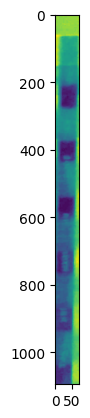

In [ ]:
print(a.shape)                #Return the shape of an array.
a2_str = a[5:1100, 2080:2151]
plt.imshow(a2_str)

# **Here we are doing same thing for our fake note.**

(1100, 3000)


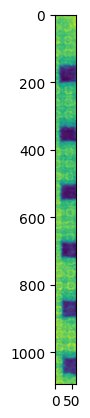

In [ ]:
print(p.shape)
p2_str = p[5:1100, 1666:1729]
plt.imshow(p2_str)

# **The image is being converted into HSV here. It is just a different format. HSV (Hue Saturation Value) is also a numeric measurement of the color of your image. The measurement is in degrees. In RGB, hue refers to the angle at which the colors lie.**

In [ ]:
ImageReal = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)
ImageFake = cv2.cvtColor(P, cv2.COLOR_BGR2HSV)

# **Here is the result**

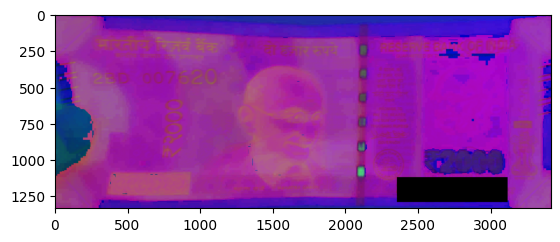

In [ ]:
plt.imshow(ImageReal)

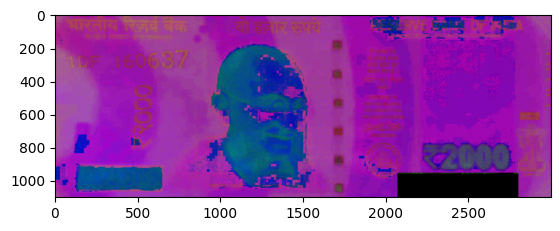

In [ ]:
plt.imshow(ImageFake)

# **Here we are extracting the thin strip from our hsv image.**

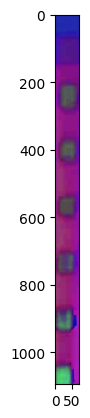

In [ ]:
croppedImageReal = ImageReal[5:1100, 2080:2151]
plt.imshow(croppedImageReal)

# **Here we are doing same thing for our fake image.**

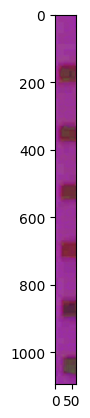

In [ ]:
croppedImageFake = ImageFake[5:1100, 1666:1729]
plt.imshow(croppedImageFake)

# **Here we are setting the thresh value and extracting only those values from the cropped image with value greater than satThresh and less than valThresh. Then we will take the ‘&’ of both values. This whole process is done to extract the lines in thin strip from thin strip image.**

In [ ]:
s = 0.3
v = 0.9
g = croppedImageReal[:,:,1]>s
h = croppedImageReal[:,:,2] < v

g1 = croppedImageFake[:,:,1]>s
h1 = croppedImageFake[:,:,2] < v
BWImageReal = g&h
BWImageFake = g1&h1

# **Bwareaopen is a function that will find the connectivity in an image. It will be used to find the number of lines from a thin strip. We will use it later in the process.**

In [ ]:
def bwareaopen(img, min_size, connectivity=8):

    # Find all connected components (called here "labels")
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img, connectivity=connectivity)

    # check size of all connected components (area in pixels)
    for i in range(num_labels):
        label_size = stats[i, cv2.CC_STAT_AREA]

        # remove connected components smaller than min_size
        if label_size < min_size:
            img[labels == i] = 0

    return img

# **Here is the code for morphological extraction of the thin strip image. This is a very important step for extracting the number of lines in image.**

In [ ]:
binr = cv2.threshold(a2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# define the kernel
kernel = np.ones((3, 3), np.uint8)

# invert the image
invert = cv2.bitwise_not(binr)

# use morph gradient
BWImageCloseReal = cv2.morphologyEx(invert, cv2.MORPH_GRADIENT, kernel)

# **Here we are doing the same thing for fake note.**

In [ ]:
binr2 = cv2.threshold(p2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]    #cv2.thresh_binary- all pixel values above a specified threshold are set to a maximum value, and all pixel values below the threshold are set to 0.

# define the kernel
kernel2 = np.ones((3, 3), np.uint8)                                            #returns a new array of given shape and data type, where the element's value is set to 1.

# invert the image
invert2 = cv2.bitwise_not(binr2)                                               #cv2.bitwise_not function. Essentially, the bitwise NOT function flips pixel values. All pixels that are greater than zero are set to zero, and all pixels that are equal to zero are set to 255

# use morph gradient
BWImageCloseFake = cv2.morphologyEx(invert2, cv2.MORPH_GRADIENT, kernel2)      #Morphological gradient is slightly different than the other operations, because, the morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the eroded and dilated image.
                                                                               #Erosion shrink-ens the image pixels i.e. it is used for shrinking of element A by using element B.
                                                                               #Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries.

# **Here we are using our bwareaopen function for the thin strip.**

In [ ]:
areaopenReal = bwareaopen(BWImageCloseReal, 15);
areaopenFake = bwareaopen(BWImageCloseFake, 15);
#BW2 = bwareaopen( BW , P ) removes all connected components (objects) that have fewer than P pixels from the binary image BW ,
#producing another binary image, BW2 . This operation is known as an area opening.

# **Here is the code for the final counting of the number of lines in real note.**

In [ ]:
bw = areaopenReal

labels = np.zeros(bw.shape)      #The numpy.zeros() function returns a new array of given shape and type, with zeros
countReal = cv2.connectedComponentsWithStats(bw, labels,8);

# **Here is the code for the final counting of the number of lines in fake note.**

In [ ]:
bw2 = areaopenFake

labels2 = np.zeros(bw2.shape)
countFake = cv2.connectedComponentsWithStats(bw2, labels2,8);

## **Here we are defining a correlation function. This correlation function will be used for our Gandhi Ji image. We just want to check the correlation between the photo of Gandhi Ji on the real and the fake one. This will take two 2d matrices as input and will give us the result in number form between 0 and 1. If the result is greater than 0.5, then Gandhi Ji photo on a fake note is legitimate otherwise not.**

In [ ]:
def corr2(A, B):

    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

## **Here we are using our correlation function. Also, we are writing our code to check if the correlation value is greater than 0.5 or not. If it is greater than 0.5 then we are checking if the number of lines is equal or not.**

In [ ]:
co=corr2 (a2tr, b2tr)

if (co.any()>=0.5):
    print ('correlevance of transparent gandhi > 0.5')
    if (countReal[0] == countFake[0] ):
        print ('currency is legitimate')
    else:
        print ('green strip is fake')
else:
    print ('correlevance of transparent gandhi < 0.5')
    print ('currency is fake')

correlevance of transparent gandhi > 0.5
green strip is fake
